$ f(\textbf{xi}) = \omega ^ T \textbf{xi} + b $

$ f(xi) = \hat{\omega}^T X $

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23560\559074531.py:1: SyntaxWarning: invalid escape sequence '\c'
  data = pd.read_csv('D:\codeVS\ML\LinearRegression\multiple_linear_regression_dataset.csv')


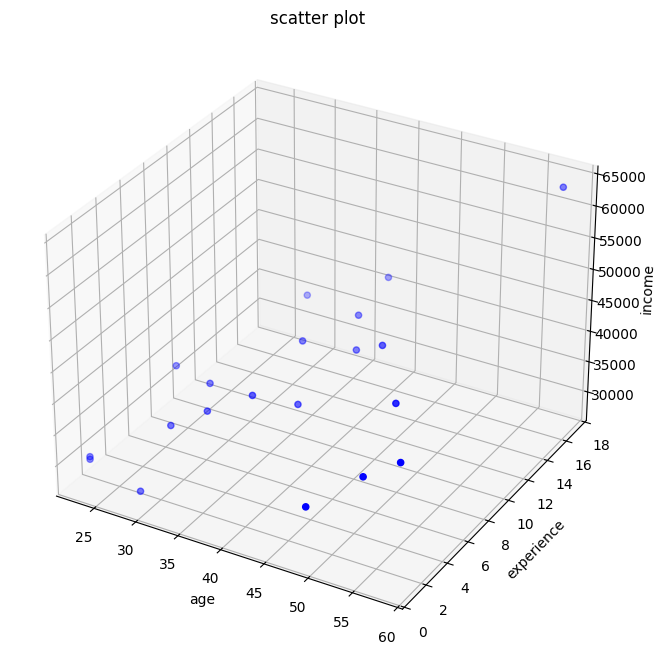

In [8]:
data = pd.read_csv('D:\codeVS\ML\LinearRegression\multiple_linear_regression_dataset.csv')
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

age = data['age']
experience = data['experience']
income = data['income']

ax.scatter(age, experience, income, color='blue', marker='o', label='Data Points')
ax.set_xlabel('age')
ax.set_ylabel('experience')
ax.set_zlabel('income')
ax.set_title('scatter plot')
plt.show()

In [9]:
X = data[['age', 'experience']]
X['bias'] = 1
Y = data['income']

# 判断X.T * X是否满秩
print(np.linalg.matrix_rank(X.T @ X) == min(X.shape[0], X.shape[1]))

True


$ \hat{\omega} = (X^TX)^{-1}X^Ty $

0      -96.983117
1     2162.216160
2    31165.442069
dtype: float64


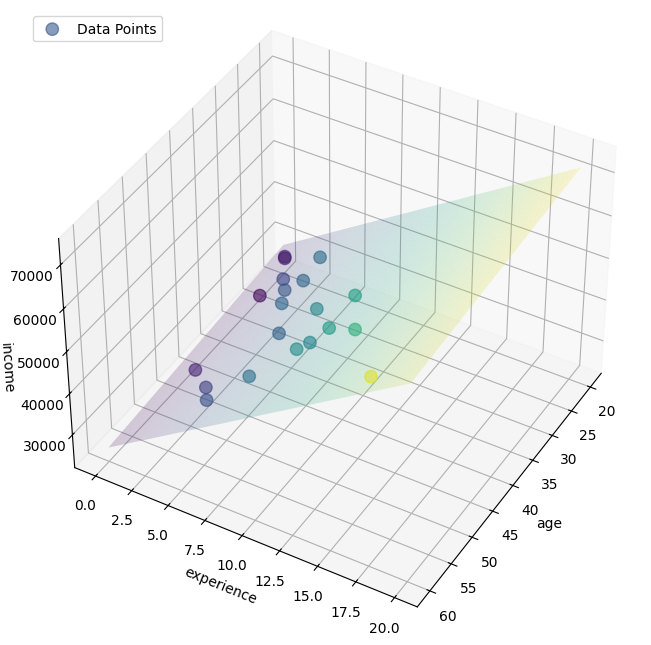

In [10]:
w = np.linalg.inv(X.T @ X) @ X.T @ Y
print(w)

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def linear_equation(age, experience):
    return w[0] * age + w[1] * experience + w[2]

plot_size = min(50, len(age))
plot_indice = np.random.choice(len(age), size=plot_size, replace=False)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(age[plot_indice], experience[plot_indice], income[plot_indice], c = income[plot_indice], cmap = 'viridis', marker='o', s=80, alpha=0.6, label='Data', zorder=2)
age_points = np.linspace(20, 60, 200)
experience_points = np.linspace(0, 20, 200)
age_grid, experience_grid = np.meshgrid(age_points, experience_points)
income_pred = linear_equation(age_grid, experience_grid)

ax.plot_trisurf(age_grid.flatten(), experience_grid.flatten(), income_pred.flatten(), cmap='viridis', alpha=0.2, linewidth=0, zorder=1)
ax.set_xlabel('age')
ax.set_ylabel('experience')
ax.set_zlabel('income')

ax.view_init(elev=40, azim=30)
ax.legend(handles=[scatter], labels=['Data Points'], loc='upper left')
plt.show()

### 对于不满秩的情况，采用岭回归
#### 专门用于处理多重共线性问题，在损失函数中添加一个正则化项
##### 优点：处理多重共线性
##### 缺点：正则化参数的选择

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23560\3830217056.py:10: SyntaxWarning: invalid escape sequence '\s'
  raw_data = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)


Is X_train.T * X_train full rank? True
Mean Squared Error: 24.48
Model coefficients: [-1.09234061e-01  3.22706863e-02  7.49805942e-03  2.54546998e+00
 -9.53795159e+00  4.46450537e+00 -1.21910176e-02 -1.33870040e+00
  2.48881816e-01 -1.14746211e-02 -8.28604284e-01  1.26421124e-02
 -5.23833016e-01]
Model intercept: 25.10409923377453


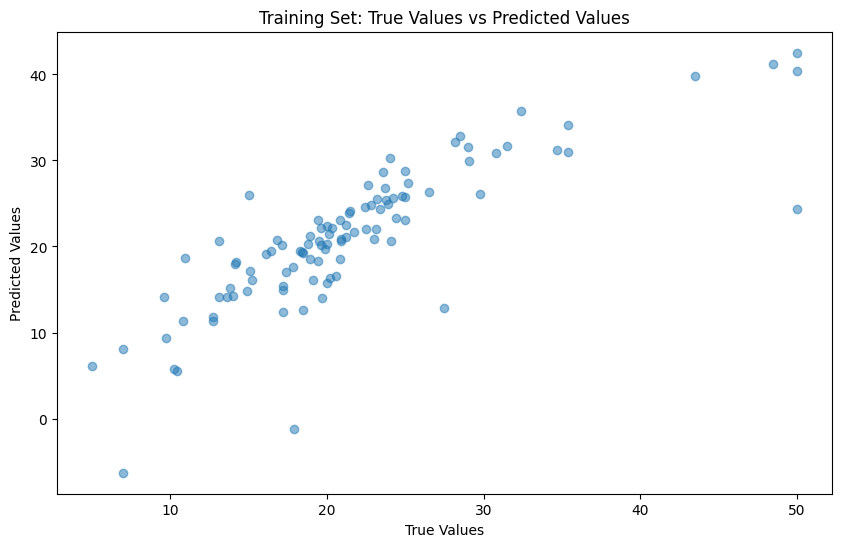

In [17]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data_url = 'https://lib.stat.cmu.edu/datasets/boston'
raw_data = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)
data = np.hstack([raw_data.values[::2, :], raw_data.values[1::2, :2]])
target = raw_data.values[1::2, 2]

X = data
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
is_full_rank_train = np.linalg.matrix_rank(X_train.T @ X_train) == min(X_train.shape[0], X_train.shape[1])
print("Is X_train.T * X_train full rank?", is_full_rank_train)

# 设置正则化参数alpha
ridge_regression = Ridge(alpha=1.0)
ridge_regression.fit(X_train, y_train)

y_pred = ridge_regression.predict(X_test)
# 计算均方误差MSE
mse_ridge = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_ridge:.2f}')

print(f'Model coefficients: {ridge_regression.coef_}')
print(f'Model intercept: {ridge_regression.intercept_}')

# 画散点图比较真实值和预测值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Training Set: True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### 套索回归

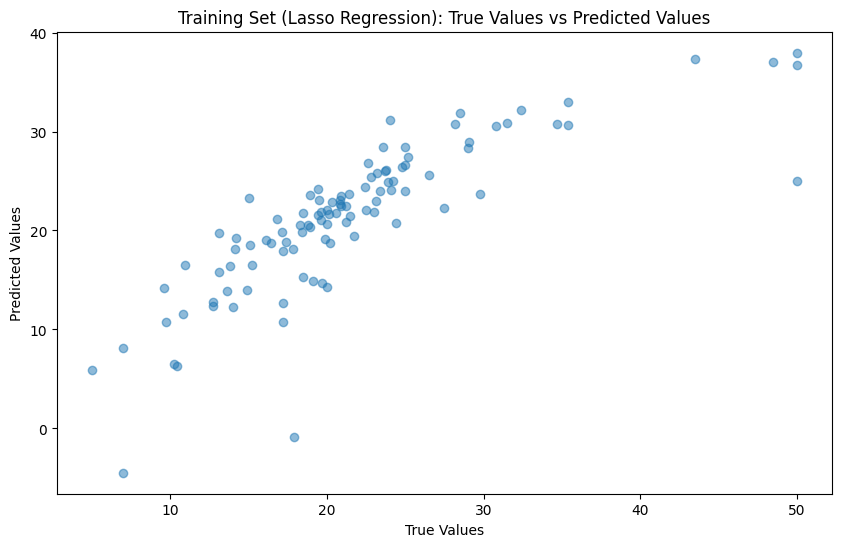

Mean Squared Error: 24.48
Model coefficients: [-0.07660927  0.02850064 -0.          0.         -0.          1.63048892
  0.01639478 -0.63085765  0.21965363 -0.01228558 -0.70858233  0.0111811
 -0.74710661]
Model intercept: 34.9357803779119


In [19]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.title('Training Set (Lasso Regression): True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# 计算均方误差MSE
mse_lasso = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_lasso:.2f}')

print(f'Model coefficients: {lasso_model.coef_}')
print(f'Model intercept: {lasso_model.intercept_}')

### 弹性网络回归
#### 套索回归和岭回归的组合

Mean Squared Error: 27.39
Model coefficients: [-0.96927363  0.63657075  0.1846292   0.72638625 -1.92922304  3.16001125
 -0.16696083 -2.9745127   2.01542506 -1.54576039 -2.00909801  1.11890784
 -3.58536387]
Model intercept: 22.796534653465375


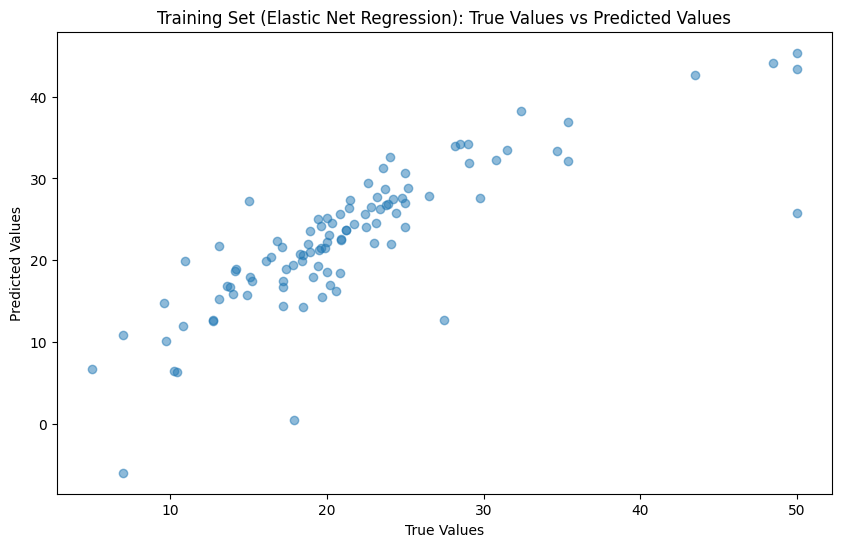

In [21]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

alpha_net = 0.01
lr1 = 0.5
elastic_net = ElasticNet(alpha=alpha_net, l1_ratio=lr1)
elastic_net.fit(X_train_scaled, y_train)

y_pred_net = elastic_net.predict(X_test_scaled)
mse_net = mean_squared_error(y_test, y_pred_net)
print(f'Mean Squared Error: {mse_net:.2f}')

print(f'Model coefficients: {elastic_net.coef_}')
print(f'Model intercept: {elastic_net.intercept_}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_net, alpha=0.5)
plt.title('Training Set (Elastic Net Regression): True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()